In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.covariance import empirical_covariance
import seaborn as sns
from sklearn.model_selection import train_test_split
from numpy.linalg import eigvals
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

dataset = pd.read_csv("sonar.all-data", sep=",", header=None)
X = dataset.drop(60, 1)
y = dataset[60]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [18]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [21]:
prediction = clf.predict(X_test)


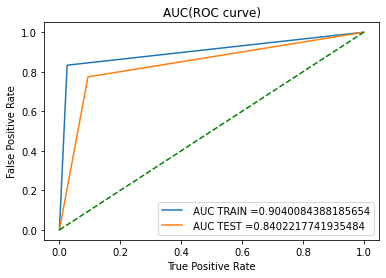

In [22]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_t1 = []
y_t2 = []

for elem in y_test:
    if elem == 'M':
        y_t1.append(0)
    else:
        y_t1.append(1)

for elem in prediction:
    if elem == 'M':
        y_t2.append(0)
    else:
        y_t2.append(1)
        
test_fpr, test_tpr, te_thresholds = roc_curve(y_t1, y_t2)

plt.grid()

plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

In [5]:
pd.DataFrame({'truth':y_test,'prediction':prediction})

,truth,prediction
186,M,M
155,M,M
165,M,R
200,M,M
58,R,R
...,...,...
88,R,R
39,R,R
114,M,M
132,M,M


In [7]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,prediction))

[[29  3]
 [ 7 24]]


In [8]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           M       0.81      0.91      0.85        32
           R       0.89      0.77      0.83        31

    accuracy                           0.84        63
   macro avg       0.85      0.84      0.84        63
weighted avg       0.85      0.84      0.84        63



In [9]:
X.corr()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
7,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
8,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
9,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


<AxesSubplot:>

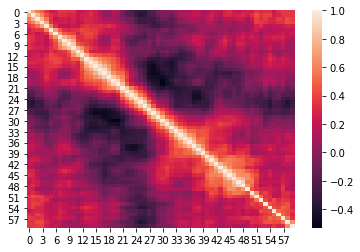

In [10]:
sns.heatmap(X.corr())

In [11]:
empirical_covariance(X)

array([[5.26040863e-04, 5.54965164e-04, 5.02523469e-04, ...,
        5.44954701e-05, 5.05078370e-05, 3.99528562e-05],
       [5.54965164e-04, 1.08113405e-03, 9.83082765e-04, ...,
        7.49226313e-05, 7.14114700e-05, 5.92047846e-05],
       [5.02523469e-04, 9.83082765e-04, 1.46962016e-03, ...,
        8.26679396e-05, 1.00479774e-04, 7.19491427e-05],
       ...,
       [5.44954701e-05, 7.49226313e-05, 8.26679396e-05, ...,
        4.16575952e-05, 2.18995109e-05, 1.06842617e-05],
       [5.05078370e-05, 7.14114700e-05, 1.00479774e-04, ...,
        2.18995109e-05, 3.80257905e-05, 1.98964326e-05],
       [3.99528562e-05, 5.92047846e-05, 7.19491427e-05, ...,
        1.06842617e-05, 1.98964326e-05, 2.51897076e-05]])

In [12]:
eigvals(empirical_covariance(X))

array([5.56165231e-01, 3.54580589e-01, 1.48835732e-01, 1.12365379e-01,
       8.98348674e-02, 7.74359059e-02, 7.31964335e-02, 4.57972123e-02,
       3.87933754e-02, 3.34316396e-02, 2.72298745e-02, 2.36456918e-02,
       2.03556148e-02, 1.66443660e-02, 1.51922205e-02, 1.33338216e-02,
       1.25152768e-02, 9.83900245e-03, 9.17307271e-03, 8.49125271e-03,
       6.36521021e-03, 5.10388991e-03, 4.66063103e-03, 4.17488678e-03,
       4.03655387e-03, 3.75567597e-03, 2.72023392e-03, 2.44406418e-03,
       2.25752575e-03, 2.05976392e-03, 1.68252517e-03, 1.58179433e-03,
       1.32420708e-03, 1.25893438e-03, 1.21772210e-03, 1.13333329e-03,
       9.53060795e-04, 9.13689857e-04, 8.48100847e-04, 7.03168888e-04,
       6.86276405e-04, 6.31420815e-04, 4.78377751e-04, 4.06123651e-04,
       3.34966118e-04, 2.58498788e-04, 1.59416094e-04, 1.36890202e-04,
       1.23596270e-04, 8.01230218e-05, 5.53254566e-05, 4.31942408e-05,
       3.22886742e-05, 2.63185023e-05, 5.77988559e-06, 2.13510638e-05,
      

In [13]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

print(sum(explained_variance))
explained_variance

0.9999999999999996


array([3.19711495e-01, 2.03830595e-01, 8.55581968e-02, 6.45932205e-02,
       5.16415593e-02, 4.45140182e-02, 4.20769582e-02, 2.63265202e-02,
       2.23003657e-02, 1.92181727e-02, 1.56530890e-02, 1.35927222e-02,
       1.17014219e-02, 9.56801114e-03, 8.73324557e-03, 7.66494521e-03,
       7.19440487e-03, 5.65594900e-03, 5.27313939e-03, 4.88119527e-03,
       3.65904008e-03, 2.93397030e-03, 2.67916301e-03, 2.39993300e-03,
       2.32041235e-03, 2.15894974e-03, 1.56372604e-03, 1.40496990e-03,
       1.29773832e-03, 1.18405496e-03, 9.67199330e-04, 9.09294220e-04,
       7.61220231e-04, 7.23698228e-04, 7.00007358e-04, 6.51496460e-04,
       5.47866847e-04, 5.25234469e-04, 4.87530637e-04, 4.04216524e-04,
       3.94505883e-04, 3.62972156e-04, 2.74995375e-04, 2.33460116e-04,
       1.92555220e-04, 1.48597987e-04, 9.16403165e-05, 7.86913112e-05,
       7.10492965e-05, 4.60587064e-05, 3.18038300e-05, 2.48302025e-05,
       1.85611393e-05, 1.51291869e-05, 1.22736557e-05, 1.06522511e-05,
      

In [14]:
X_reduced = pca.fit_transform(X)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_reduced, y, test_size=0.3, random_state=3)


In [15]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train1,y_train1)

SVC()

In [16]:
prediction = clf.predict(X_test1)

In [17]:
pd.DataFrame({'truth:': y_test1, 'prediction': prediction})

,truth:,prediction
174,M,M
173,M,R
118,M,M
190,M,M
162,M,M
...,...,...
100,M,R
17,R,M
30,R,R
67,R,R


In [18]:
print(confusion_matrix(y_test,prediction))

[[21 11]
 [13 18]]


59


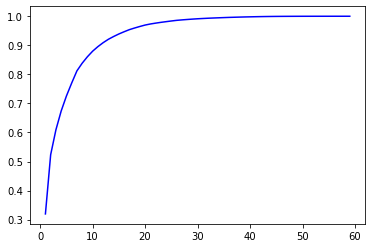

In [19]:

import numpy as np

x_line = np.arange(1, 60, 1)
y_line = []
for elem in x_line:
    y_line.append(sum(explained_variance[:elem]))
y_line = np.array(y_line)
print(len(y_line))
plt.plot(x_line, y_line, color = "blue")
plt.show()

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 36)
X_pca36 = pca.fit_transform(X)
explained_variance36 = pca.explained_variance_ratio_

print(sum(explained_variance36))
explained_variance36


0.9960040990184551


array([0.31971149, 0.2038306 , 0.0855582 , 0.06459322, 0.05164156,
       0.04451402, 0.04207696, 0.02632652, 0.02230037, 0.01921817,
       0.01565309, 0.01359272, 0.01170142, 0.00956801, 0.00873325,
       0.00766495, 0.0071944 , 0.00565595, 0.00527314, 0.0048812 ,
       0.00365904, 0.00293397, 0.00267916, 0.00239993, 0.00232041,
       0.00215895, 0.00156373, 0.00140497, 0.00129774, 0.00118405,
       0.0009672 , 0.00090929, 0.00076122, 0.0007237 , 0.00070001,
       0.0006515 ])